s_869 \
s_338 \
s_155 человек \
840


In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/home/amir/rqc_internship/sensor_repo


In [2]:
!ls data/video/pressure/s_338

0   12	16  2	23  27	30  34	38  41	45  49	52  56	6   63
1   13	17  20	24  28	31  35	39  42	46  5	53  57	60  7
10  14	18  21	25  29	32  36	4   43	47  50	54  58	61  8
11  15	19  22	26  3	33  37	40  44	48  51	55  59	62  9


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from os.path import join as jn
import os
import yaml
import torch
from torchinfo import summary
from tqdm.notebook import tqdm
from torch.utils.data import DataLoader, Dataset


In [4]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time 

In [5]:
from video_pipeline.video_module import *

In [6]:
with open('params.yaml') as conf_file:
    config = yaml.safe_load(conf_file)
with open('pathes.yaml') as conf_file:
    path_config = yaml.safe_load(conf_file)

pressure_path = path_config['p_video_path']
signal_path = path_config['test_s_video_path']


In [7]:
test_videos = [
    np.load(jn(pressure_path, 's_869/32/prepared.npz'))['arr_0'].astype(np.float32),
    np.load(jn(pressure_path, 's_155/31/prepared.npz'))['arr_0'].astype(np.float32),   # 90 - 110
    np.load(jn(pressure_path, '840/31/prepared.npz'))['arr_0'].astype(np.float32), # 170-200
    np.load(jn(pressure_path, 's_338/30/prepared.npz'))['arr_0'].astype(np.float32), # 130 - 200
    
]

In [8]:
a = np.load(jn(pressure_path, 's_869/32/prepared.npz'))['arr_0'].astype(np.float32)
b = np.load(jn('data/videos_from_isaac/', 's_869/32/force.npz'))['arr_0'].astype(np.float32)
a[:, 32, 32].mean()/b[:, 32, 32].mean()

70.59148

In [9]:
test_pressures = [
    test_videos[0][120],
    test_videos[1][110],
    test_videos[2][180],
    test_videos[3][160],
]

In [10]:
def show_video(video, start=100, step=1, end=300):
    for i, frame in enumerate(video):
        if i < start or (i%step != 0):
            continue
        if i > end:
            break
        plt.title(i)
        clear_output(wait=True)
        plt.imshow(frame)
        plt.colorbar()
        plt.show()
        time.sleep(0.1)

In [11]:
def show_frames(video, start=100, number=10):
    done = 0
    for i, frame in enumerate(video):
        if i < start:
            continue
        if done >= number:
            break
        plt.title(i)
        plt.imshow(frame)
        plt.colorbar()
        plt.show()
        done +=1

In [14]:
def visual_sim(frame):
    t = config['sim']['test_mod']
    config['sim']['test_mod'] = True
    
    import torch_sensor_lib as tsl
    sim = tsl.FiberSimulator(config)
    sim.fiber_real_sim(frame)
    config['sim']['test_mod'] = t

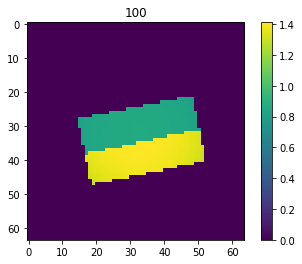

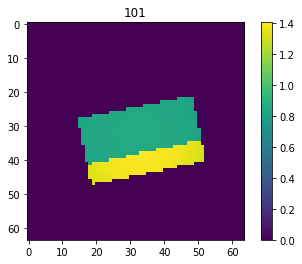

In [12]:
show_frames(test_videos[0], number=2)

In [13]:
show_video(np.load(jn(pressure_path, 's_338/30/prepared.npz'))['arr_0'], step=5, start=100, end=200)

KeyboardInterrupt: 

## Blur visual

Rot tensors


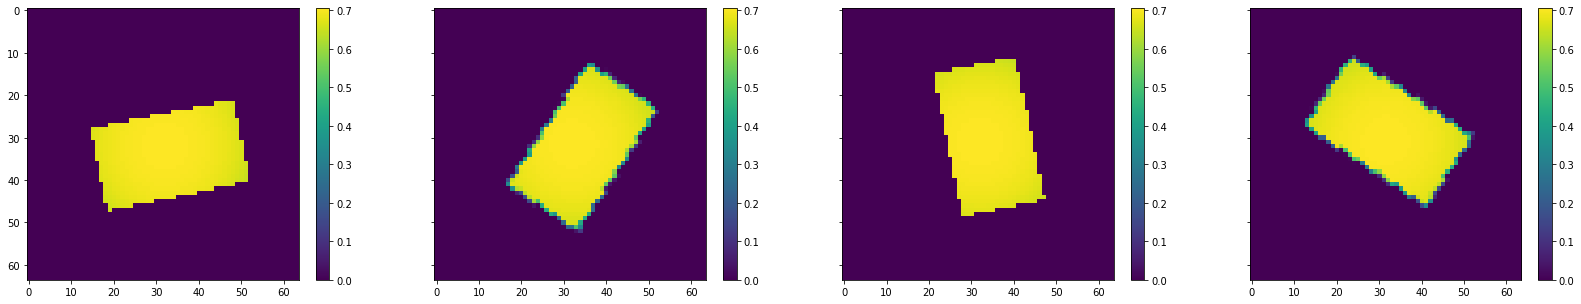

After blur


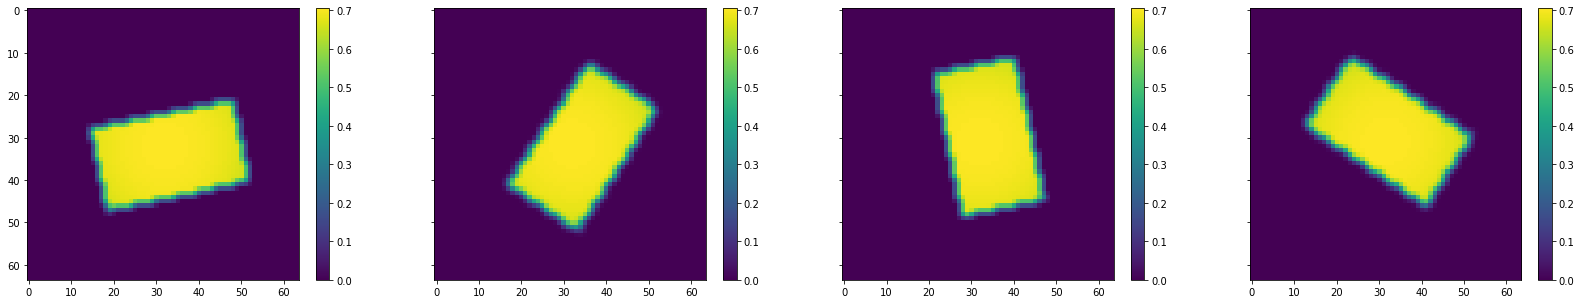

Loss in fiber


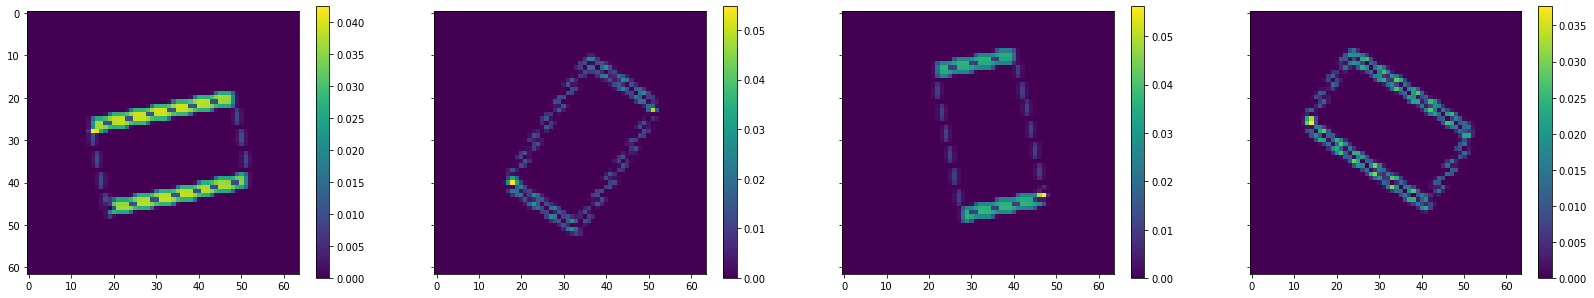

Loss sums


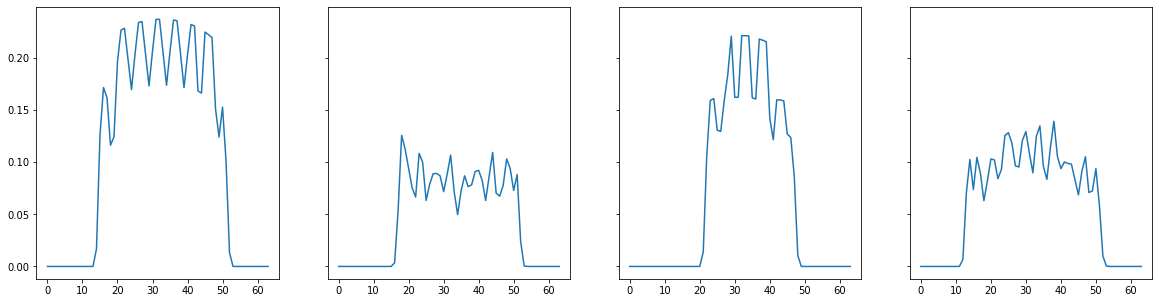

Signal


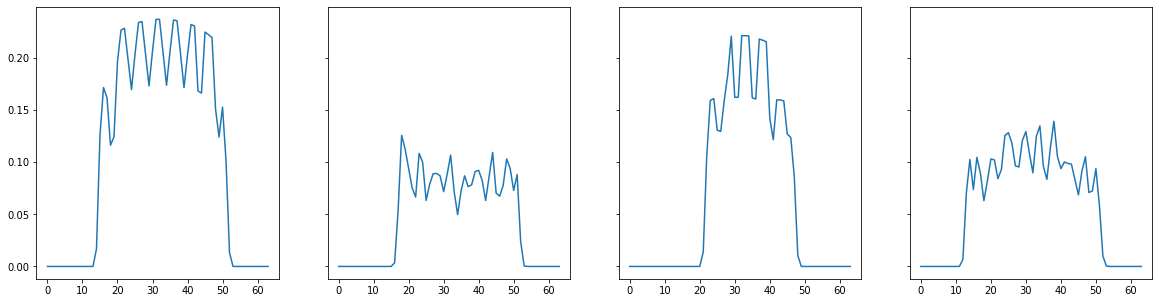

Rot tensors


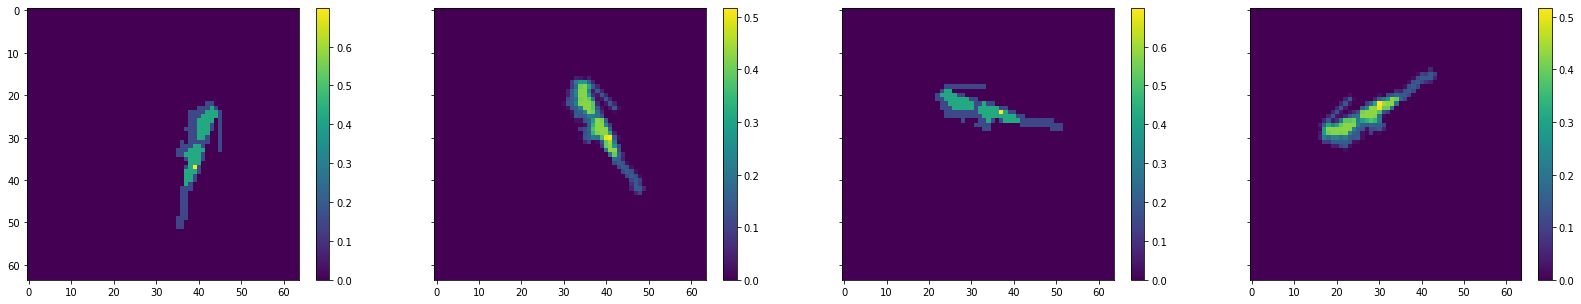

After blur


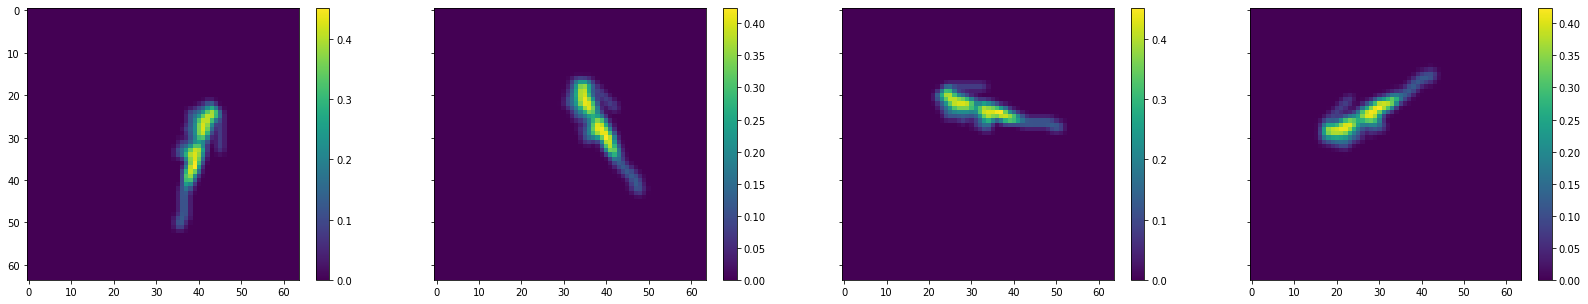

Loss in fiber


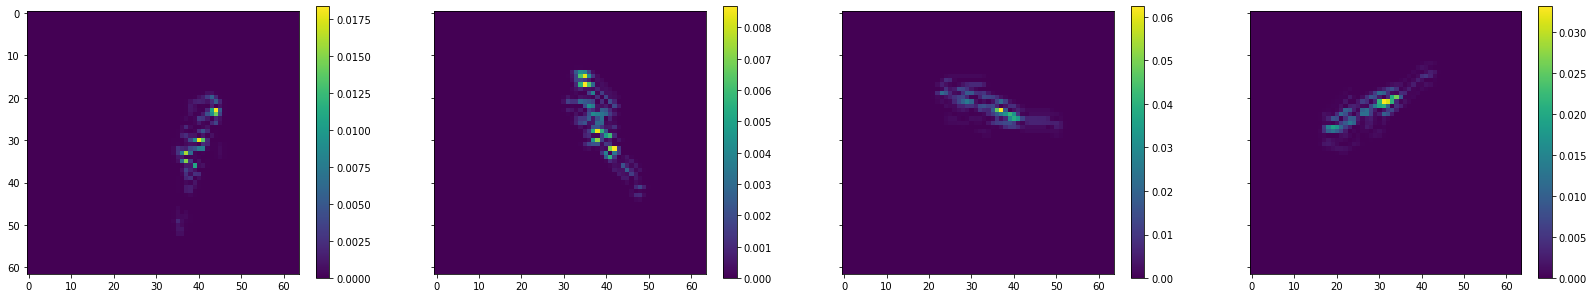

Loss sums


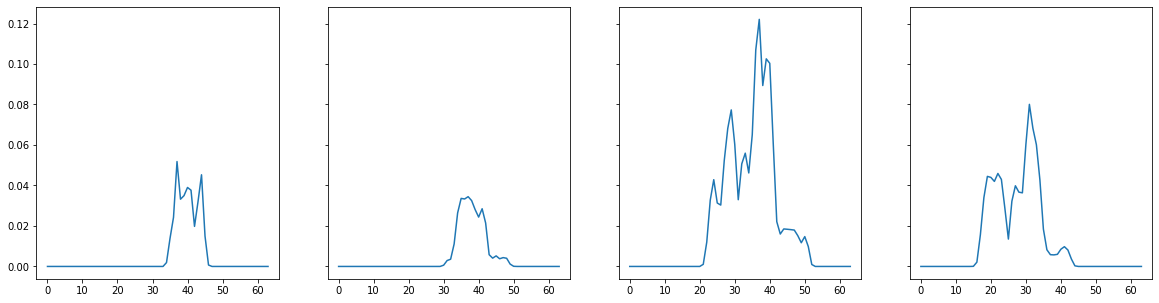

Signal


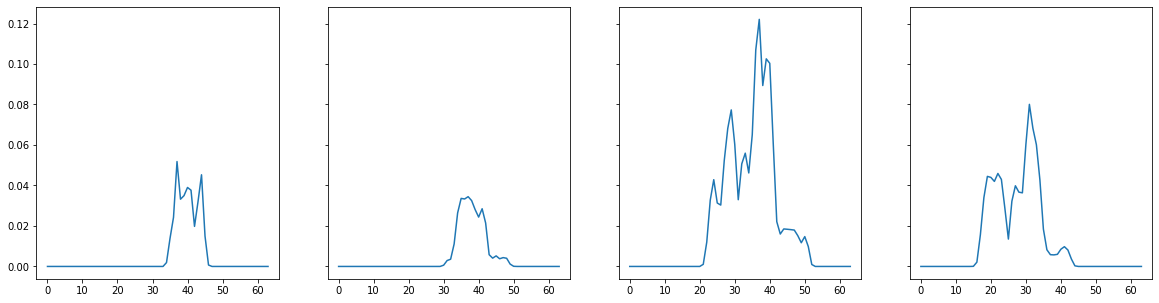

Rot tensors


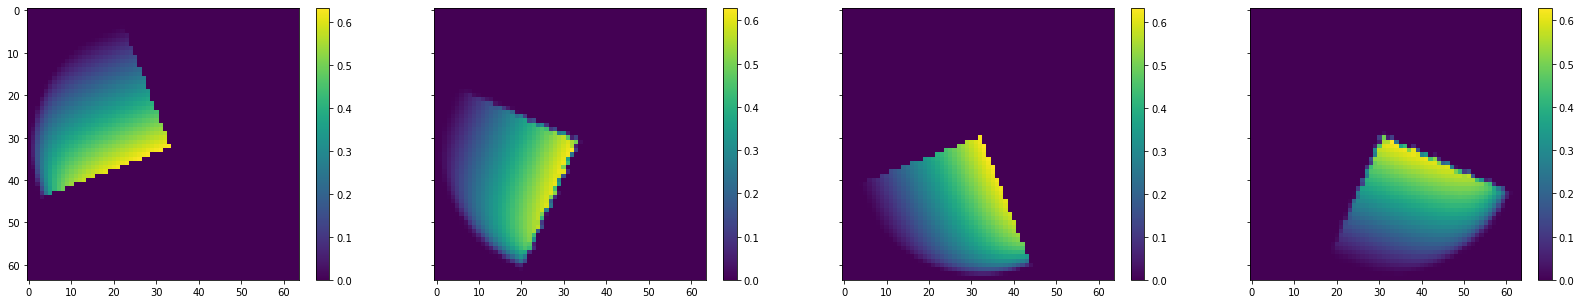

After blur


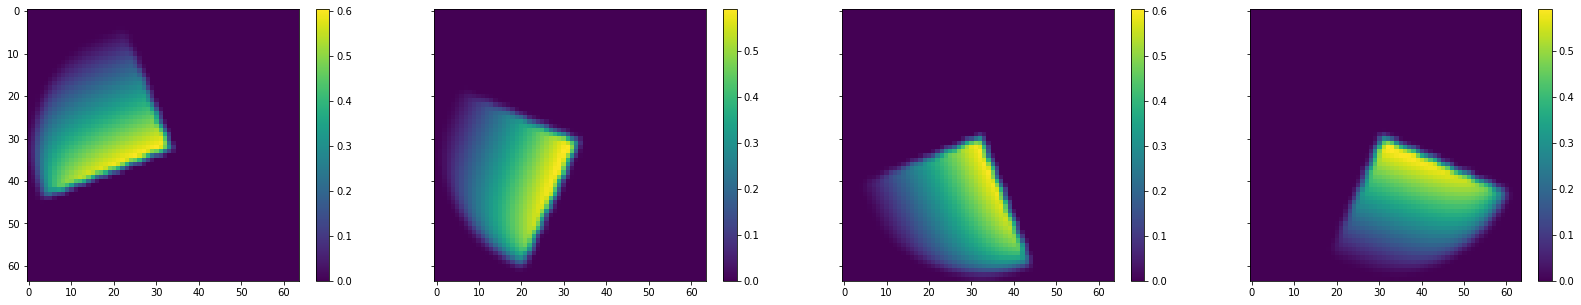

Loss in fiber


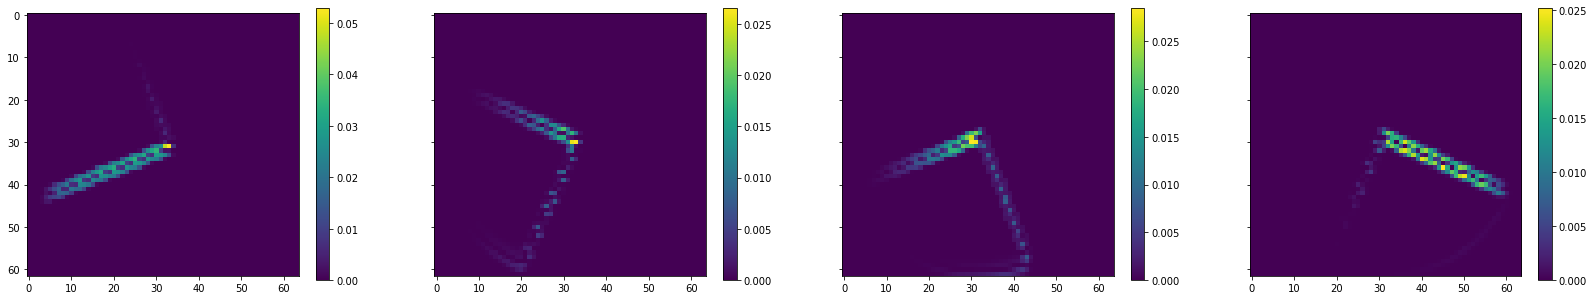

Loss sums


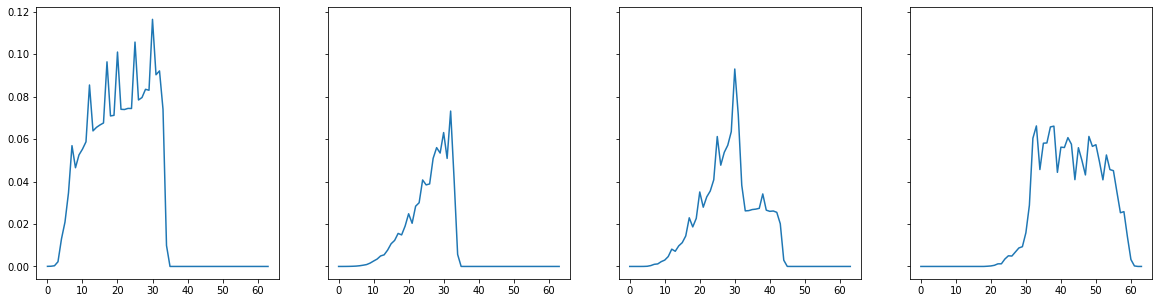

Signal


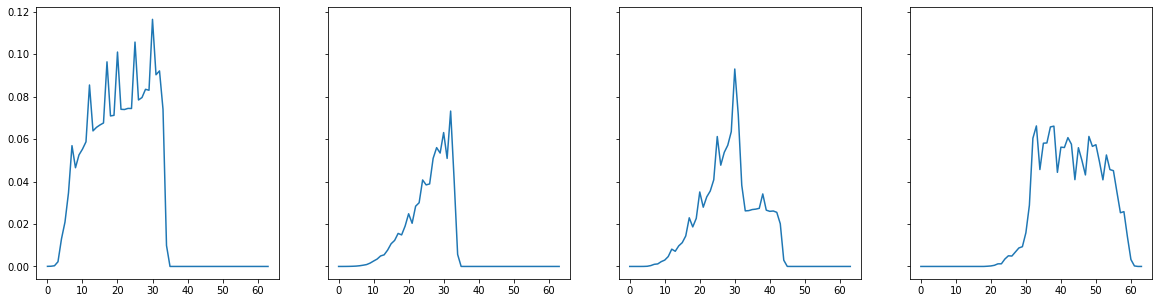

Rot tensors


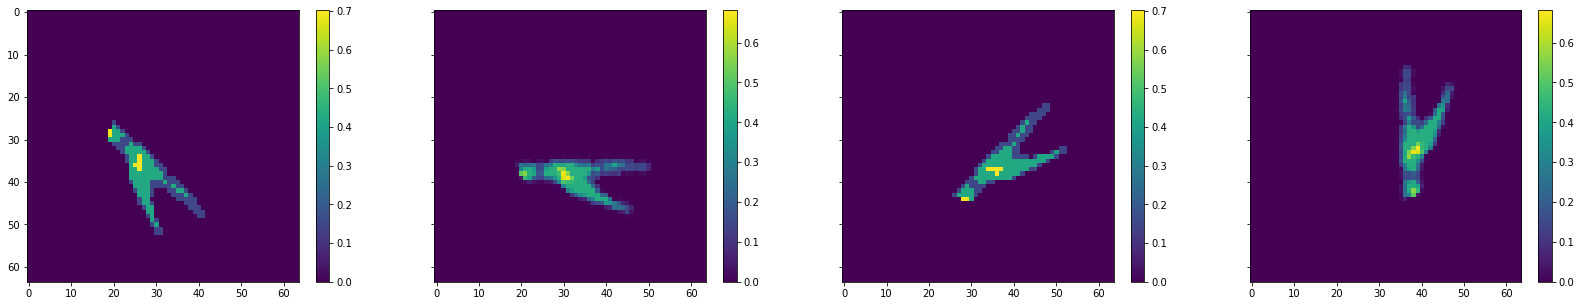

After blur


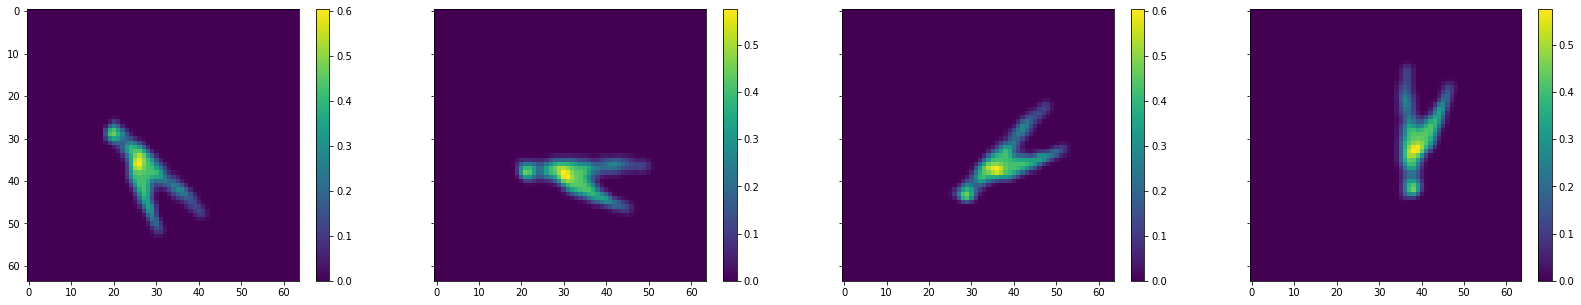

Loss in fiber


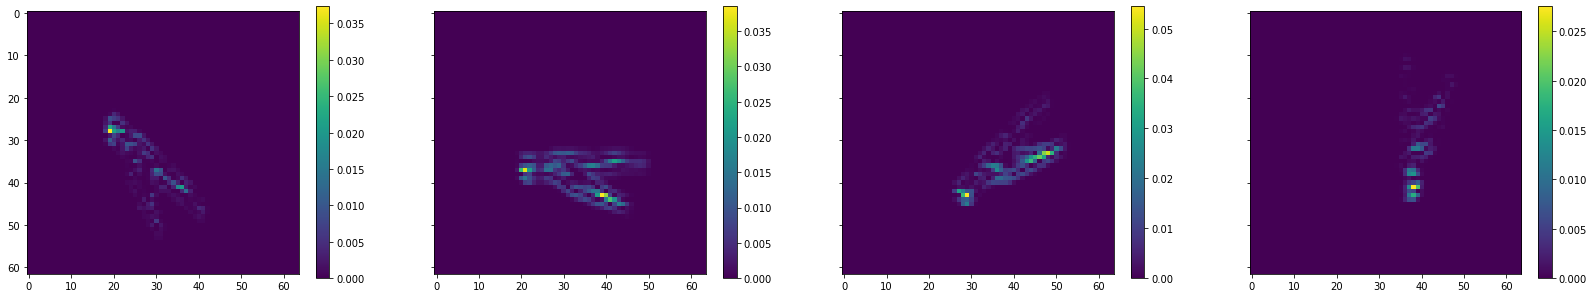

Loss sums


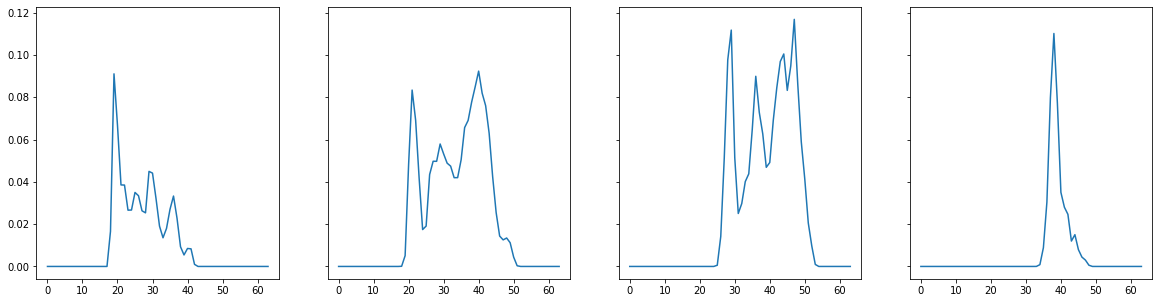

Signal


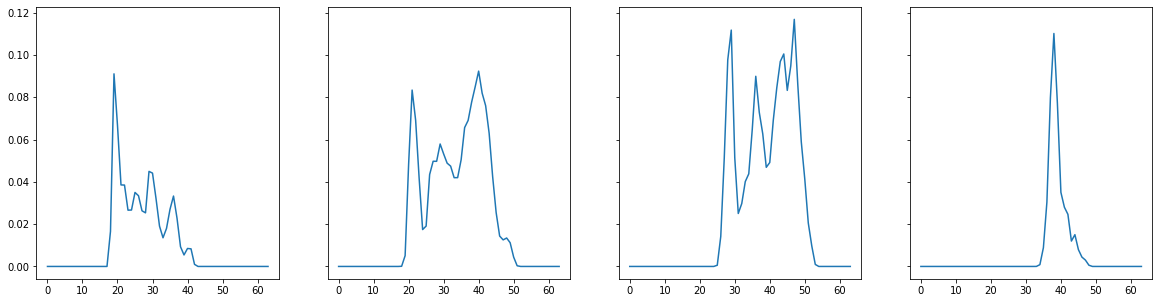

In [ ]:
for frame in test_pressures:
    visual_sim(frame)

In [ ]:

for frame in test_pressures:
    visual_sim(frame)

KERNEL SIZE IS  3
Rot tensors


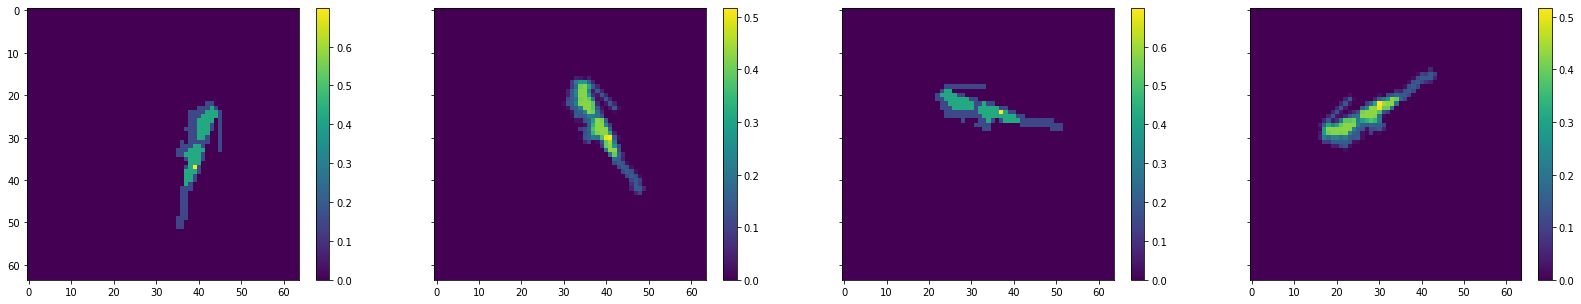

After blur


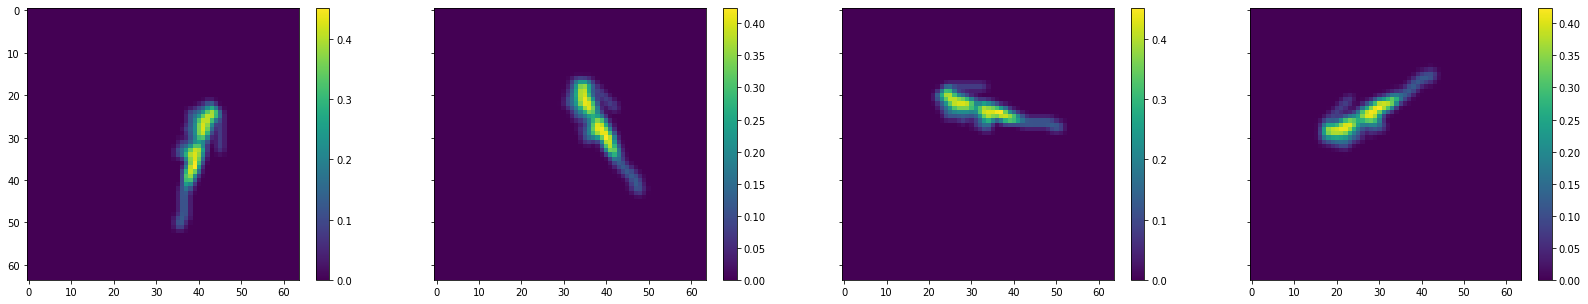

Loss in fiber


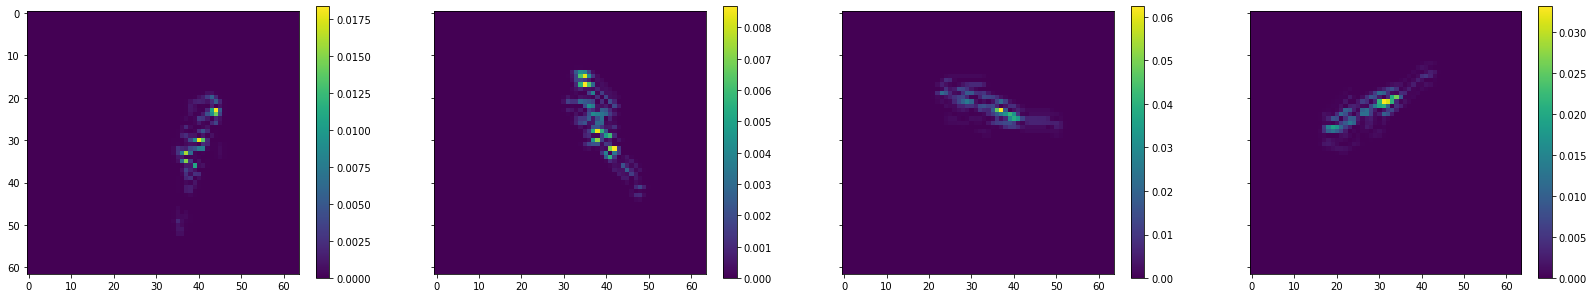

Loss sums


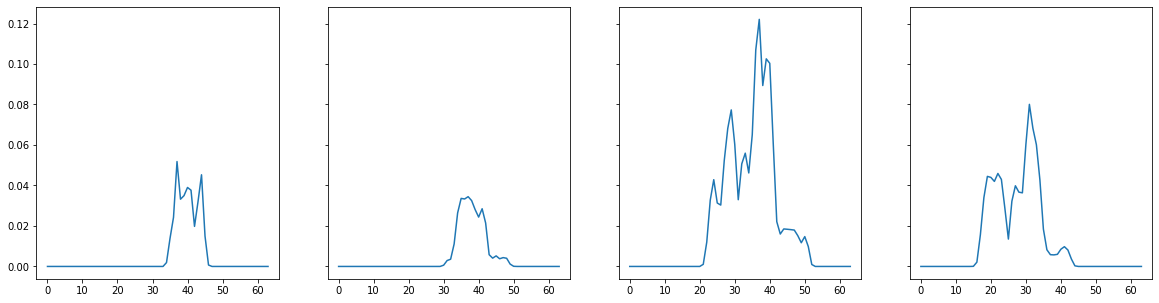

Signal


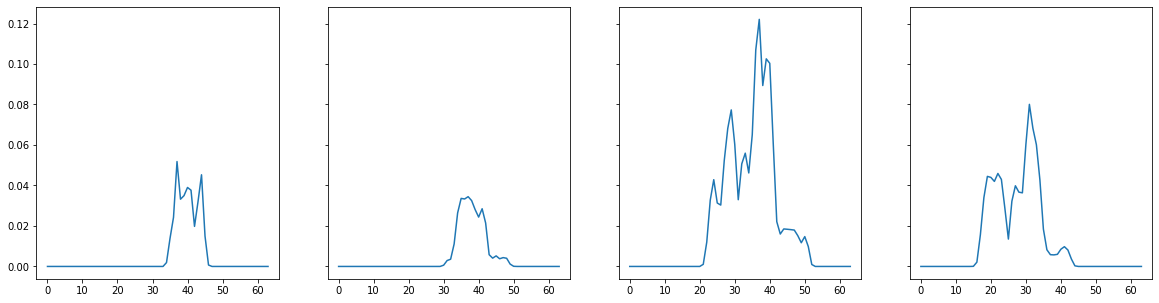

KERNEL SIZE IS  5
Rot tensors


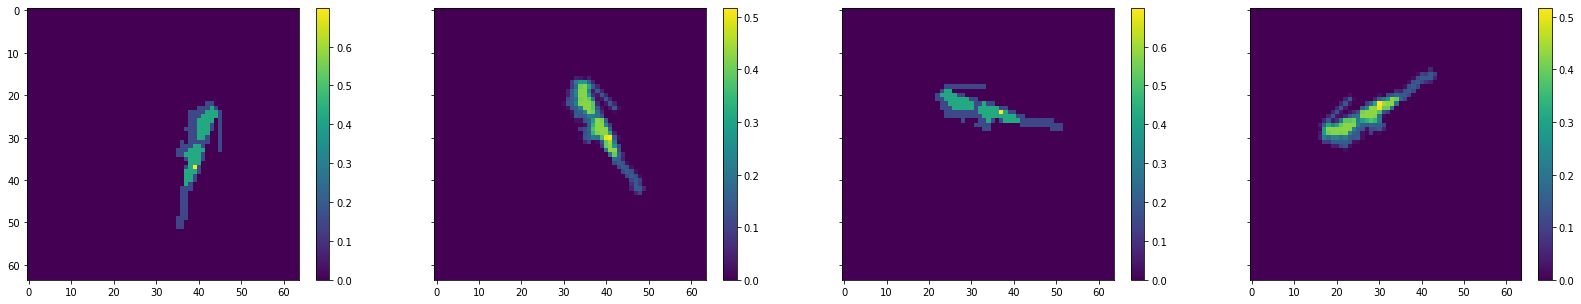

After blur


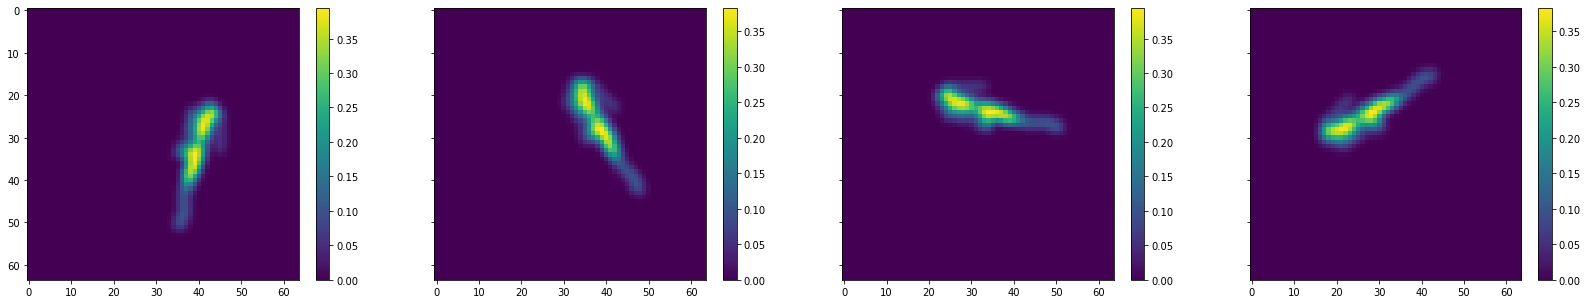

Loss in fiber


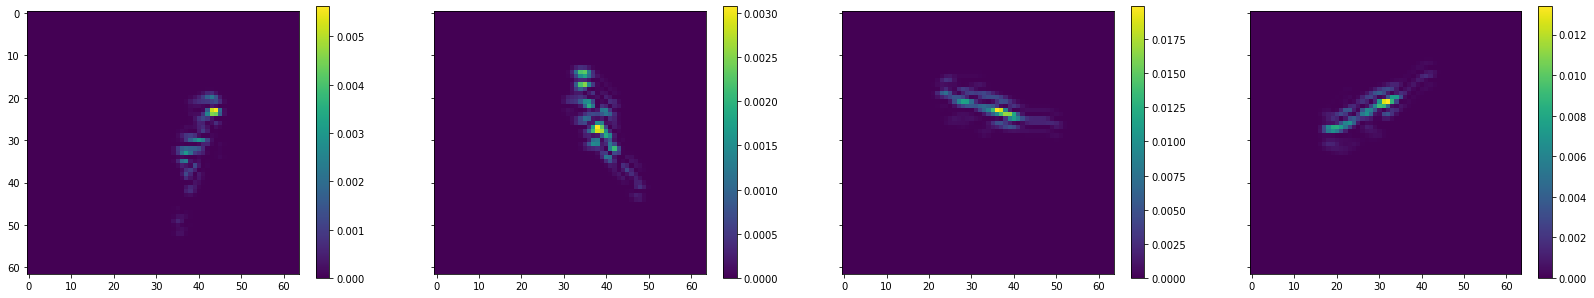

Loss sums


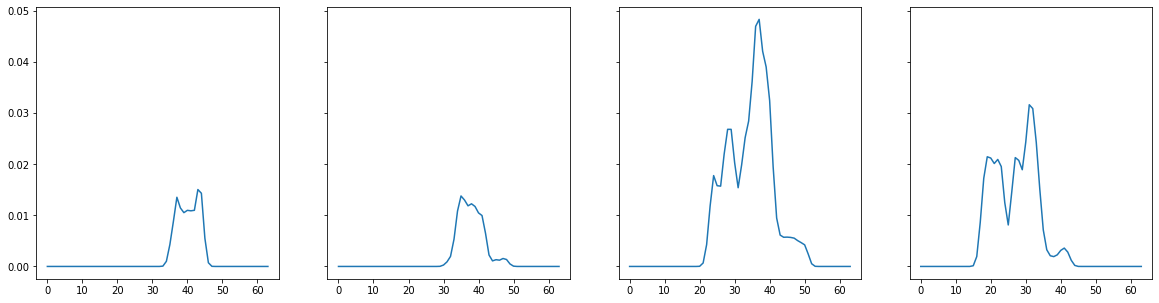

Signal


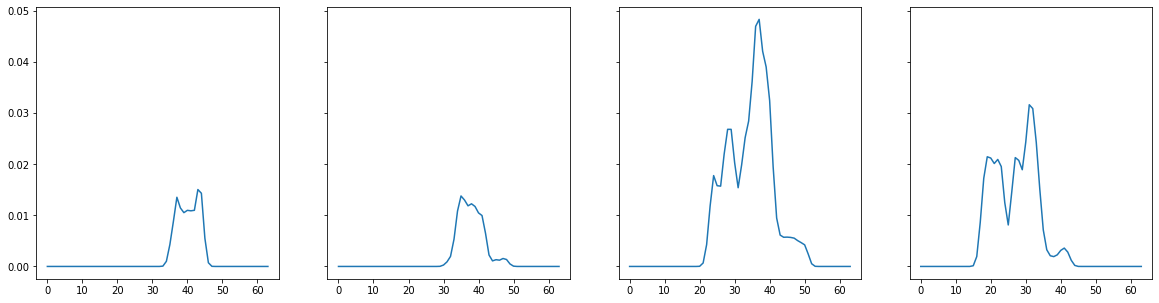

KERNEL SIZE IS  9
Rot tensors


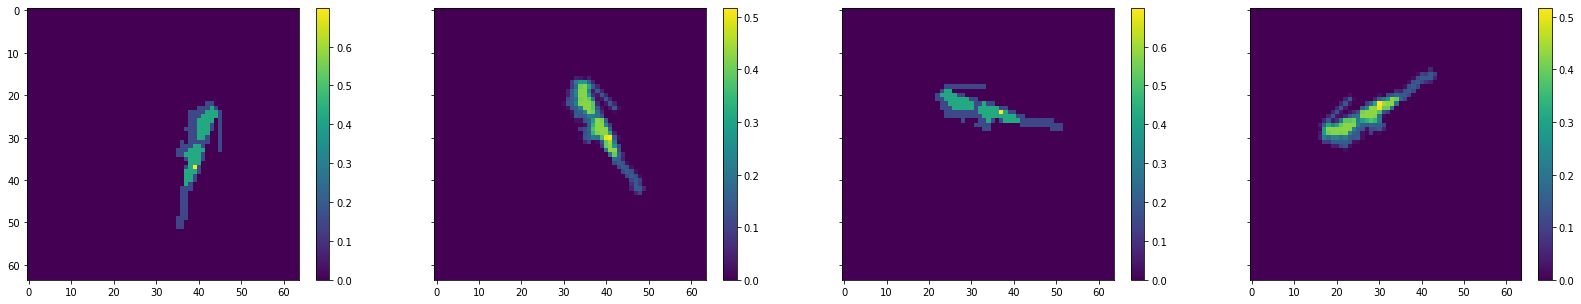

After blur


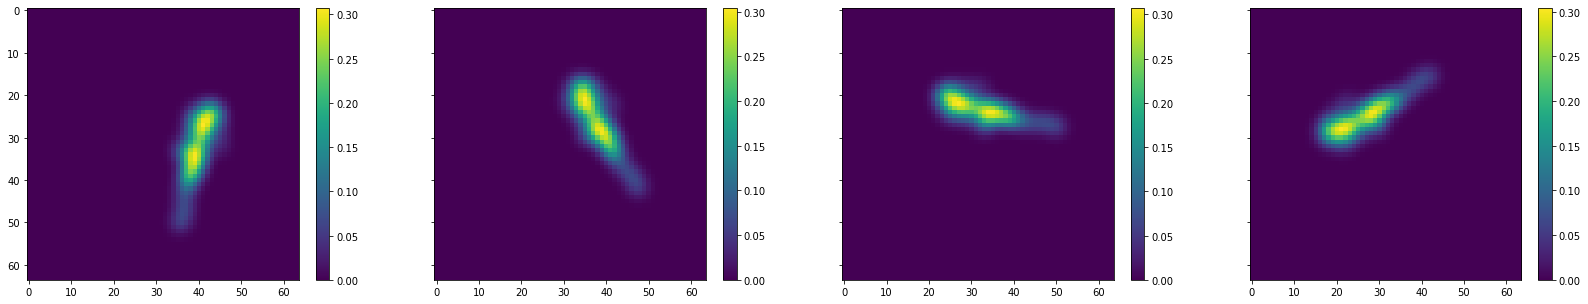

Loss in fiber


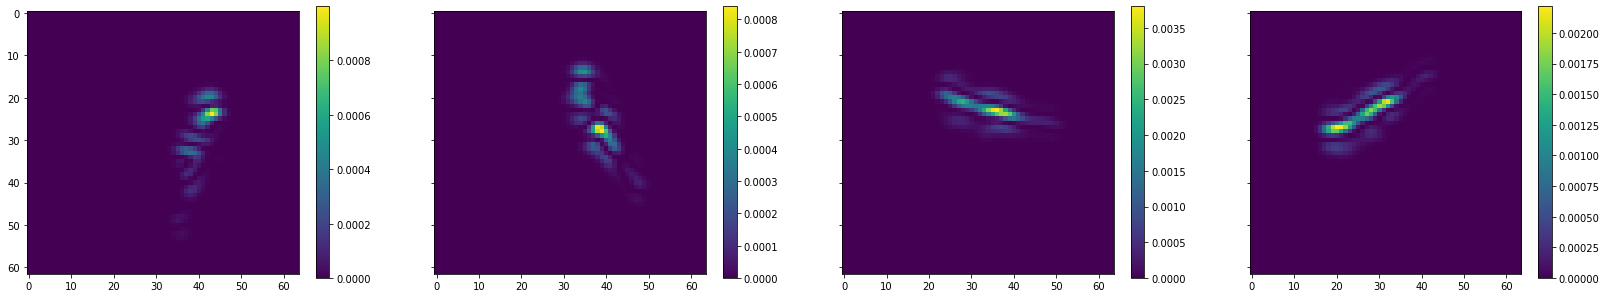

Loss sums


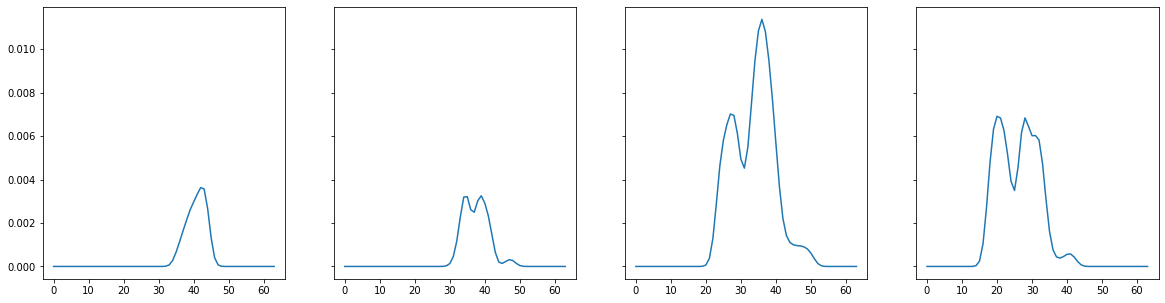

Signal


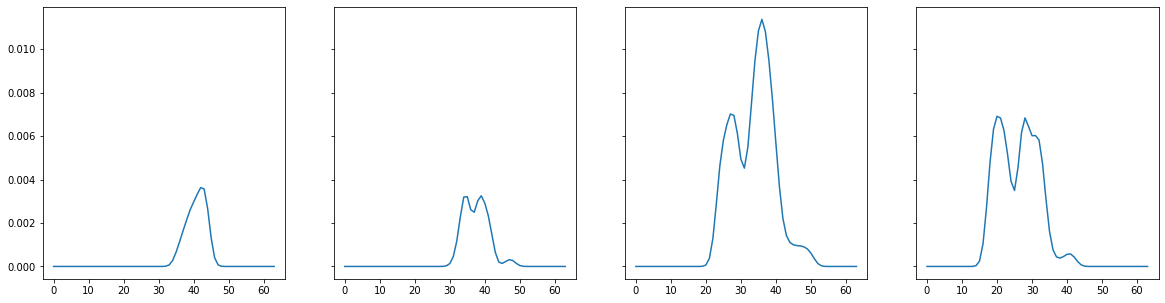

KERNEL SIZE IS  13
Rot tensors


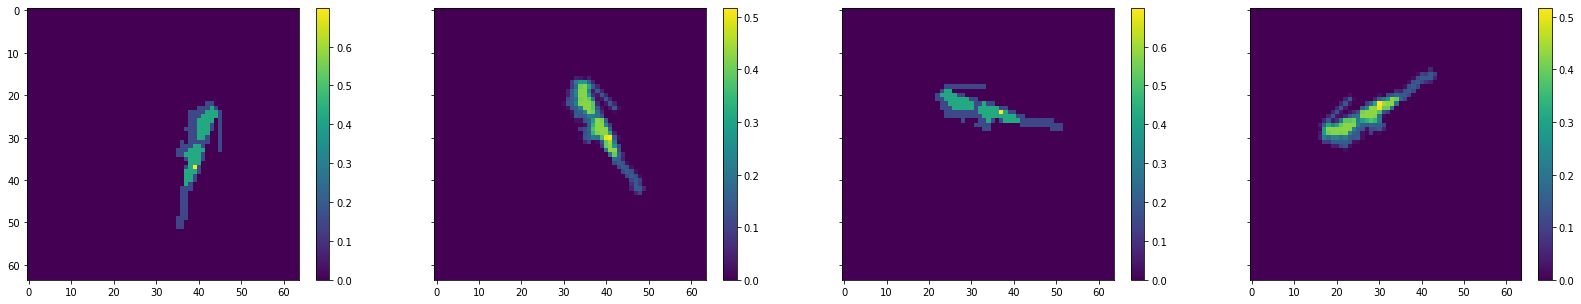

After blur


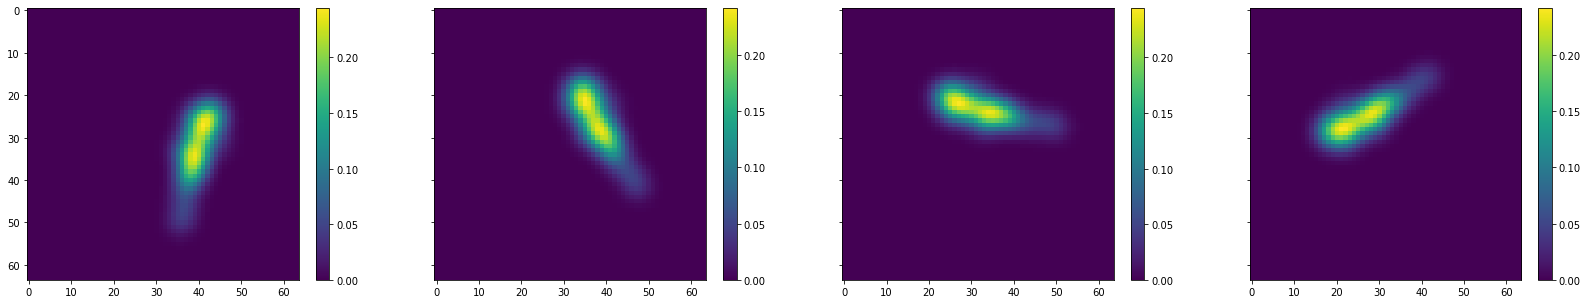

Loss in fiber


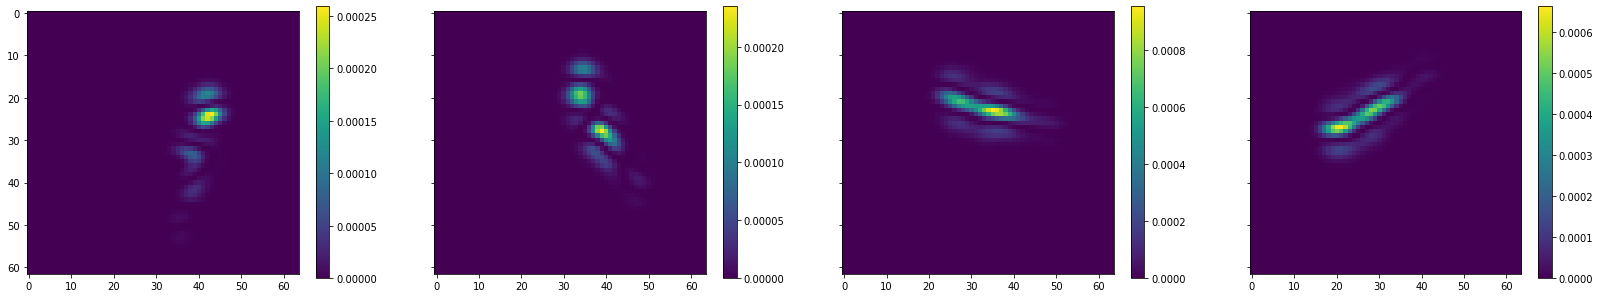

Loss sums


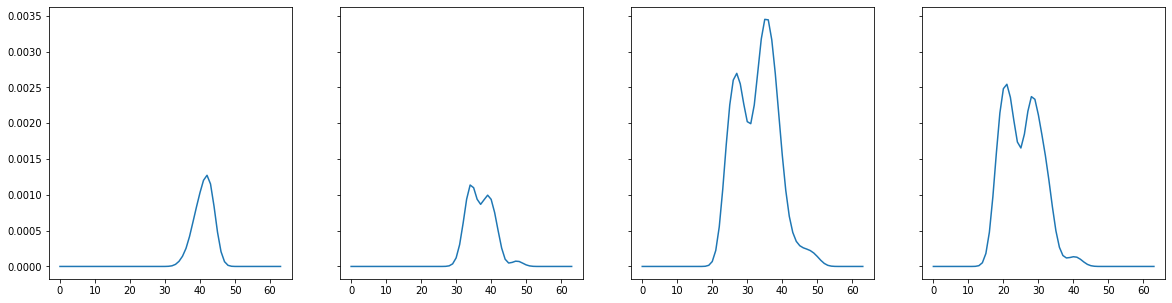

Signal


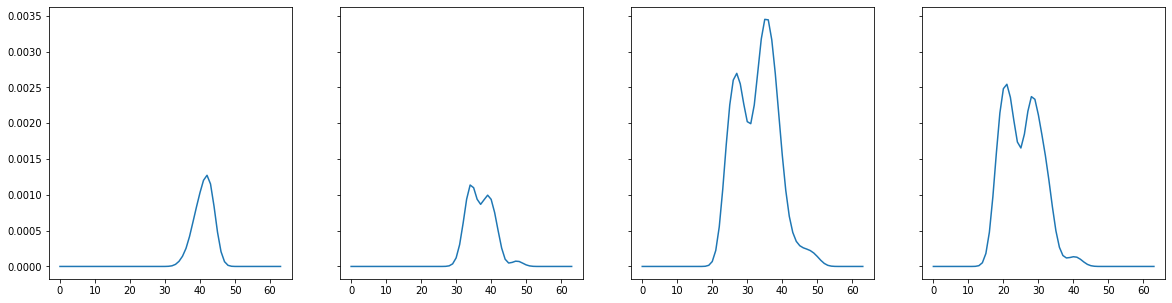

KERNEL SIZE IS  19
Rot tensors


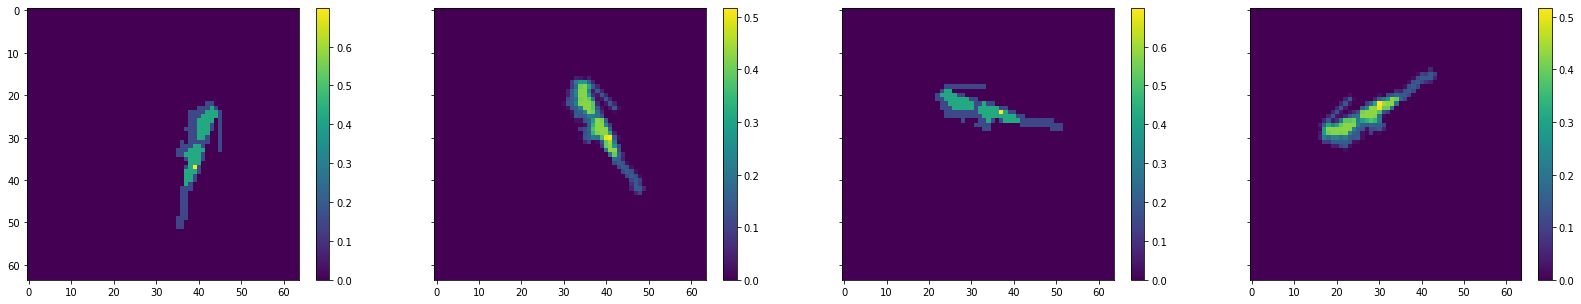

After blur


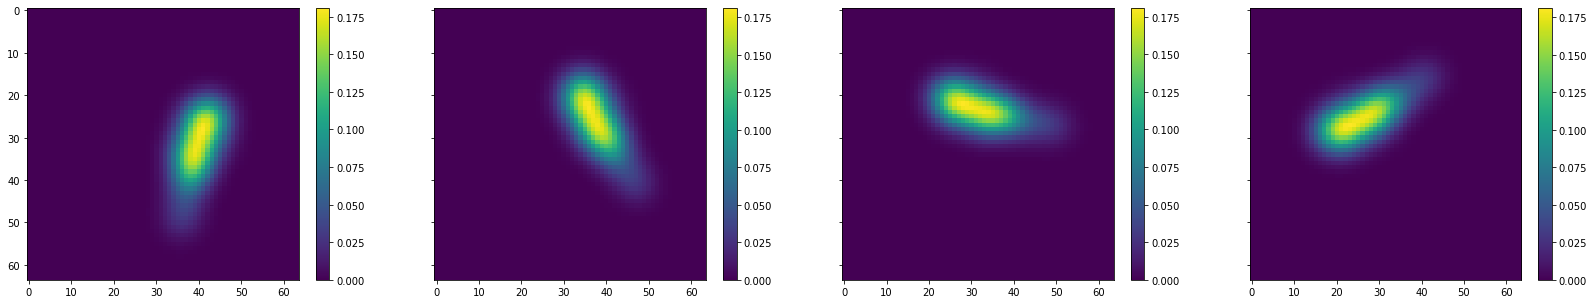

Loss in fiber


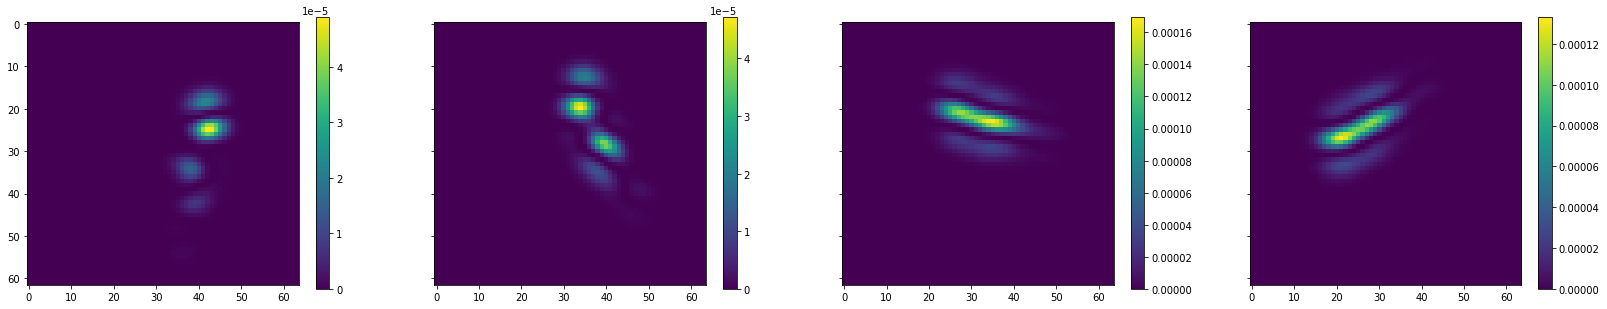

Loss sums


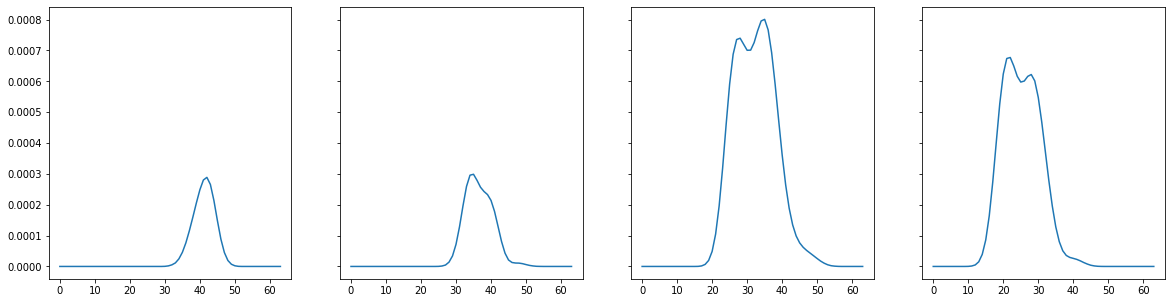

Signal


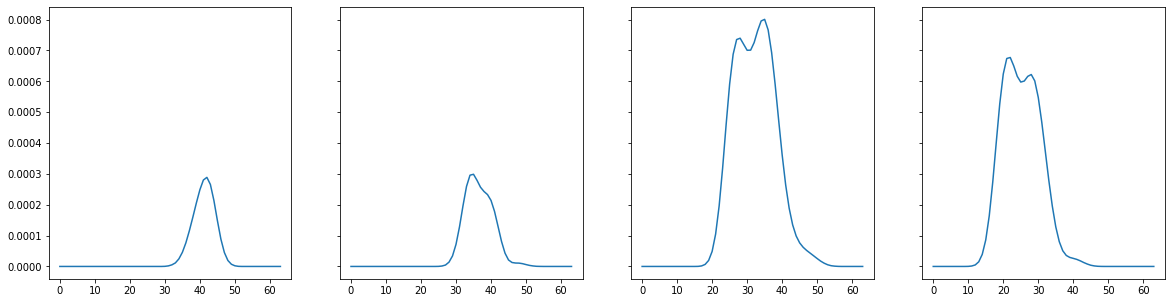

In [ ]:
blurs = [3, 5, 9, 13, 19]
frame = test_pressures[1]

for blur in blurs:
    print("KERNEL SIZE IS ", blur)
    config['env']['phys']['gaus_kernel_size'] = blur
    visual_sim(frame)

### Sens increasing

Даже в 50 раз можно увеличить чувствительность и все еще будет нормальный не зашкаливающий сигнал при таком блюре

Rot tensors


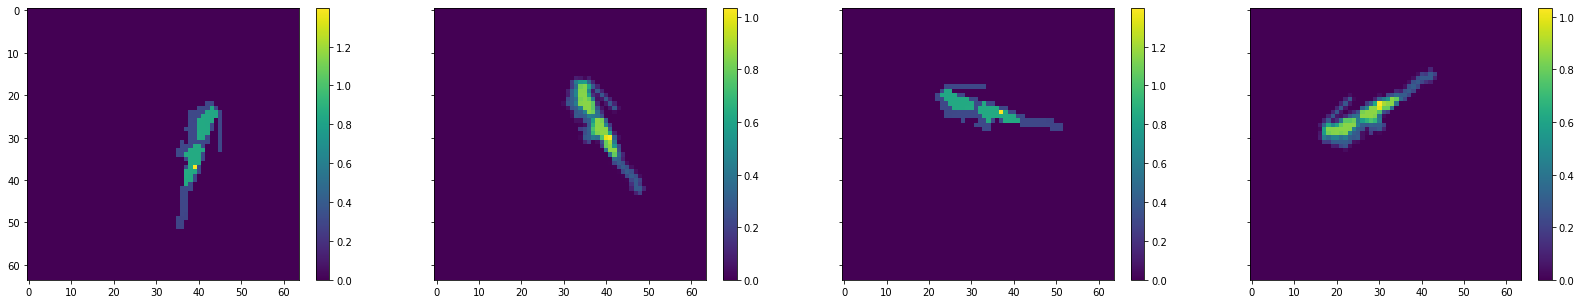

After blur


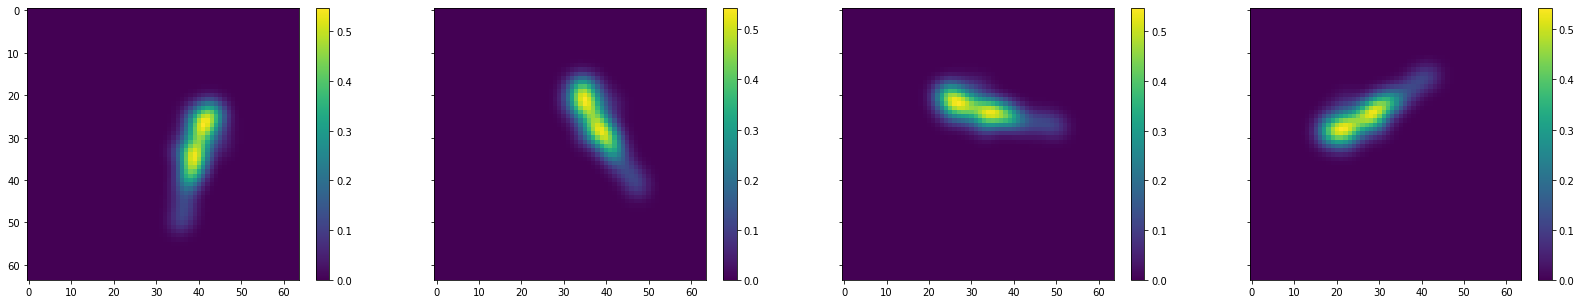

Loss in fiber


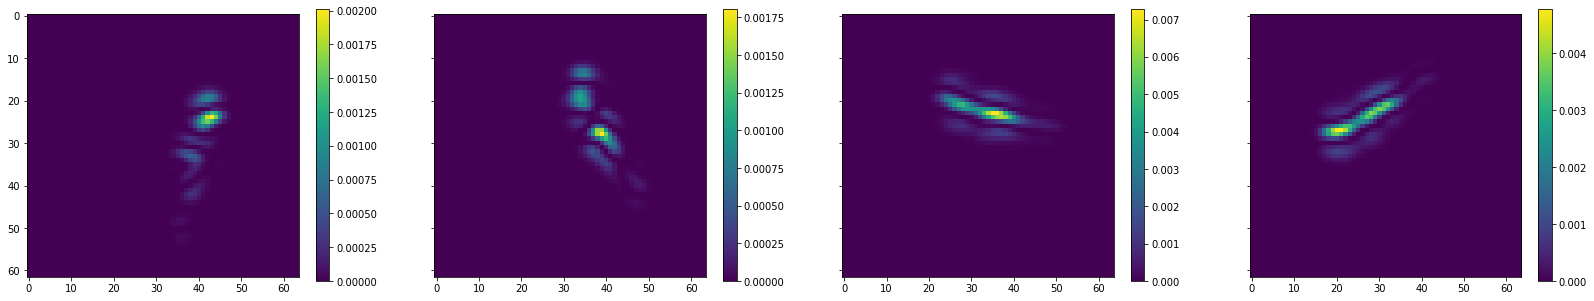

Loss sums


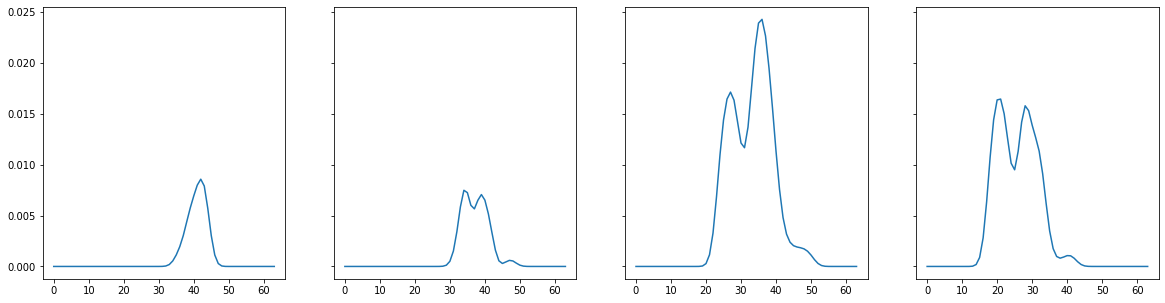

Signal


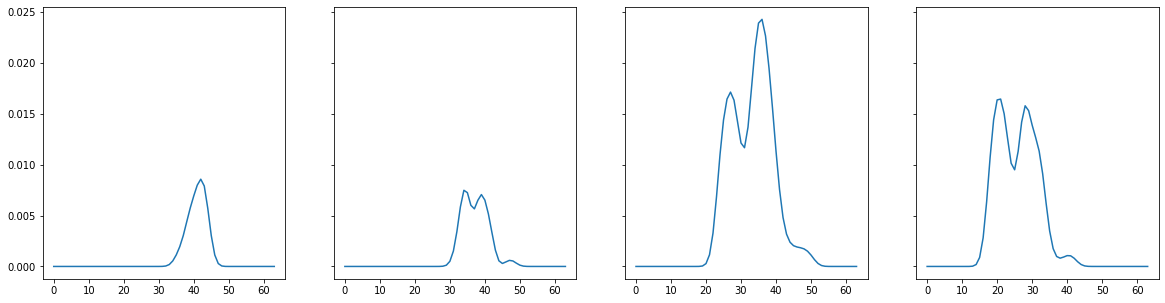

In [19]:
frame = test_pressures[1]
config['env']['phys']['gaus_kernel_size'] = 11
config['env']['phys']['kof'] = 1

visual_sim(frame)

#### for small blur

Rot tensors


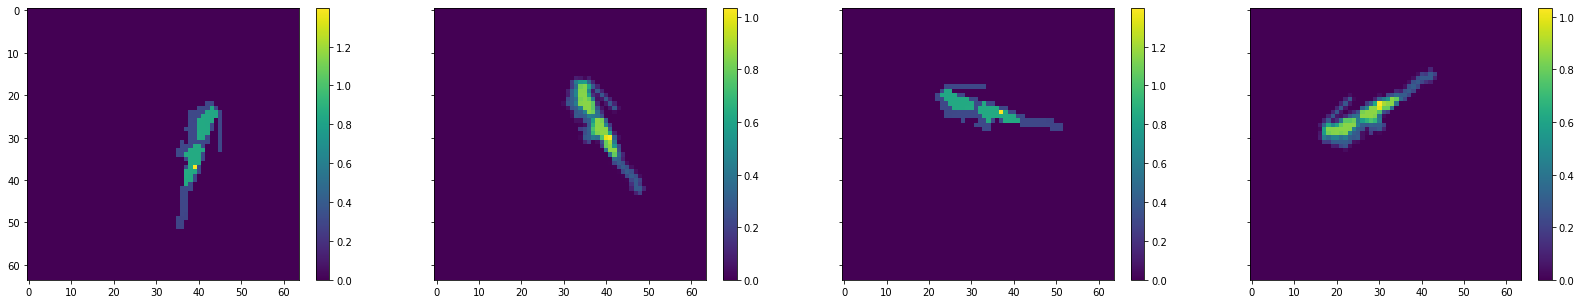

After blur


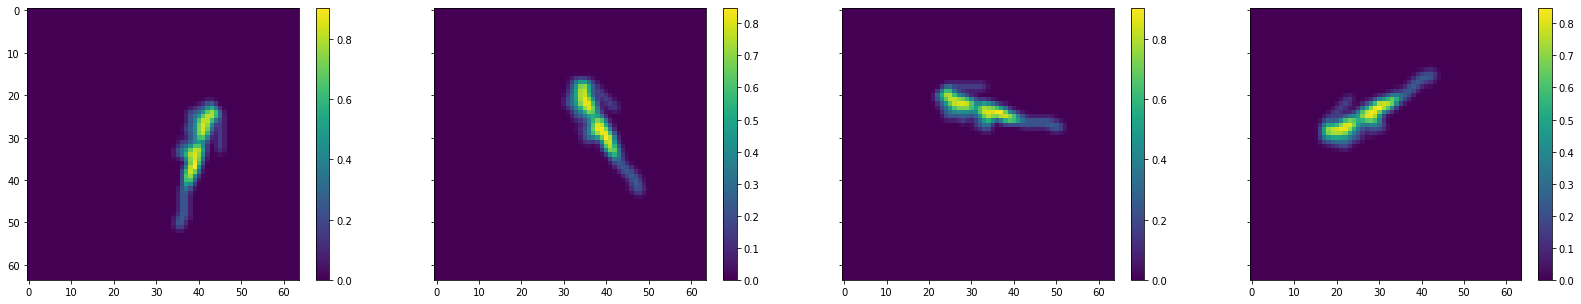

Loss in fiber


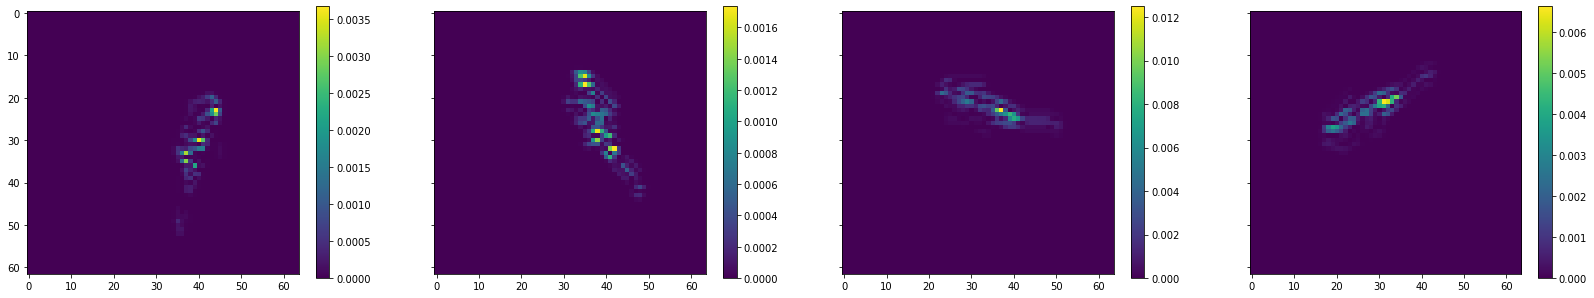

Loss sums


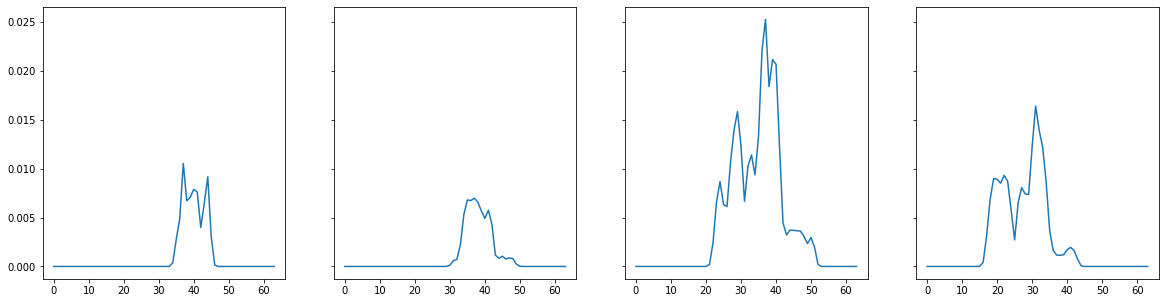

Signal


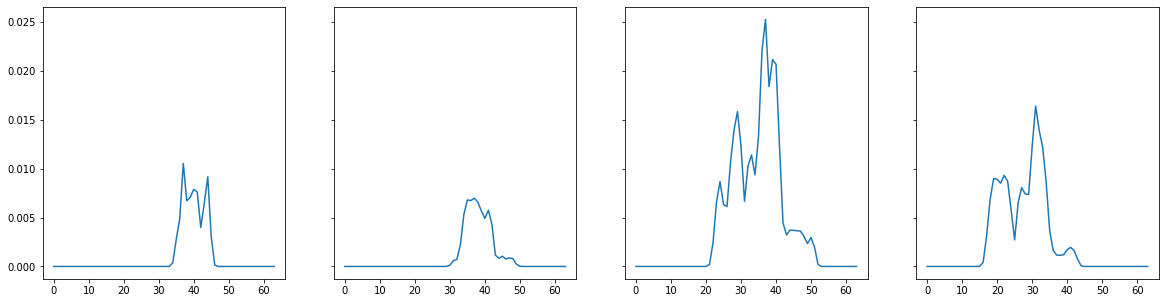

In [21]:
frame = test_pressures[1]
config['env']['phys']['gaus_kernel_size'] = 3
config['env']['phys']['kof'] = 0.1

visual_sim(frame)
# config['env']['phys']['gaus_kernel_size'] = 3
# config['env']['phys']['kof'] = 1.5

# visual_sim(frame)

## falling visualisation

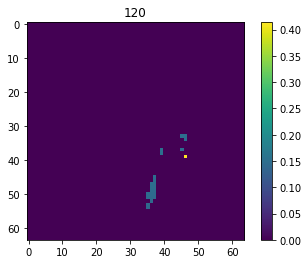

In [ ]:
show_video(test_videos[1], start=90, step=1, end=120)

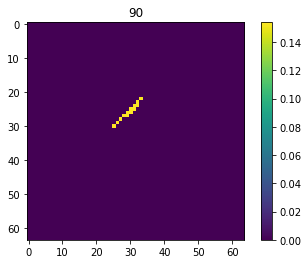

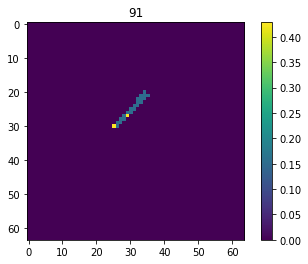

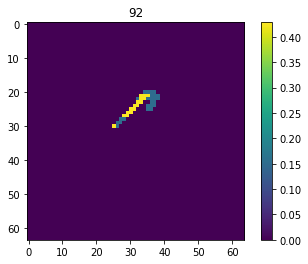

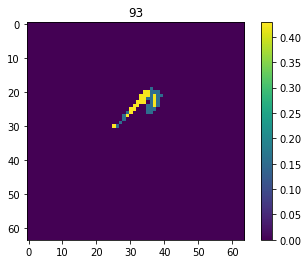

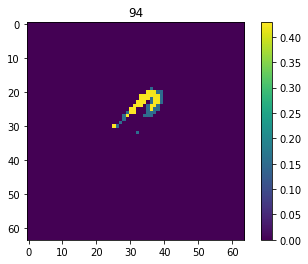

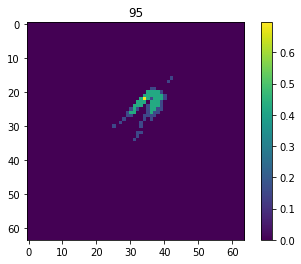

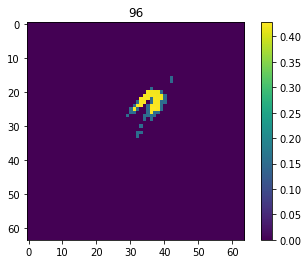

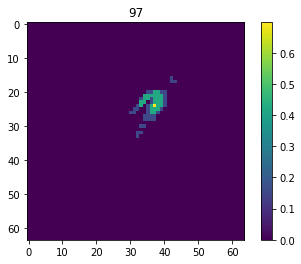

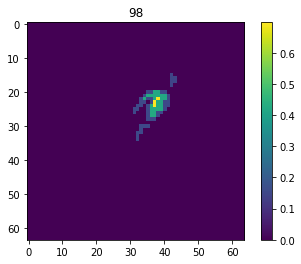

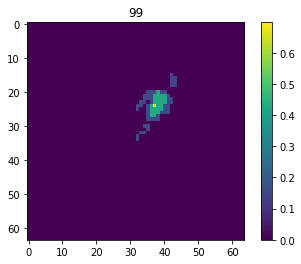

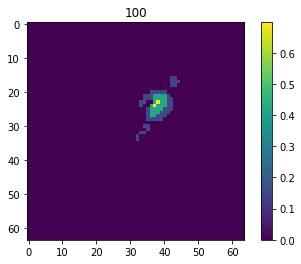

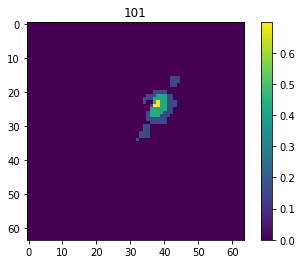

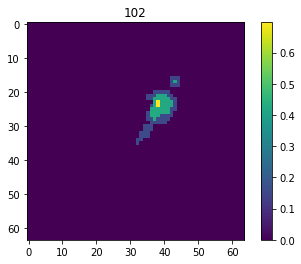

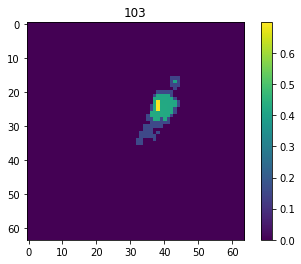

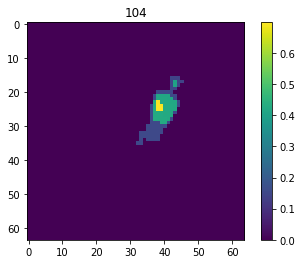

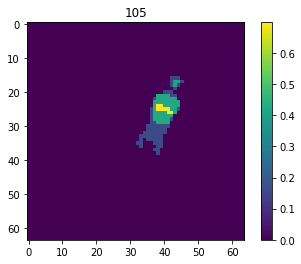

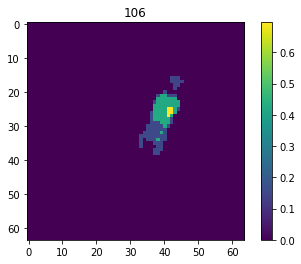

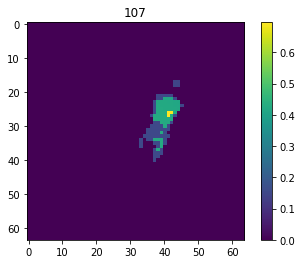

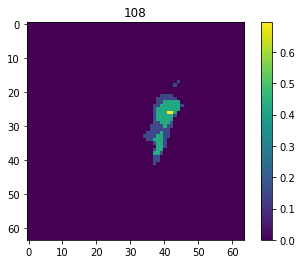

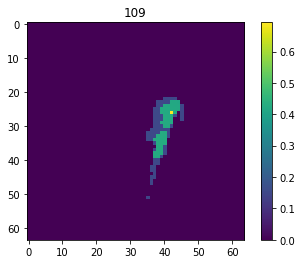

In [ ]:
show_frames(test_videos[1], start=90, number=20)